Import required **libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, mean_absolute_error


Load the uploaded CSV file

In [2]:
df = pd.read_csv('Cyber Security .csv')

Clean the data

In [4]:
# Remove commas and dollar signs from 'Financial Loss' and convert to float
df['Financial Loss (in Million $)'] = df['Financial Loss (in Million $)'].str.replace('[,$]', '', regex=True).astype(float)


In [6]:
df['Number of Affected Users'] = df['Number of Affected Users'].str.replace(',', '').astype(int)

In [8]:
# Convert 'Incident Resolution Time (in Hours)' to numeric
df['Incident Resolution Time (in Hours)'] = pd.to_numeric(df['Incident Resolution Time (in Hours)'], errors='coerce')

In [9]:
# Fill missing resolution times with median
df['Incident Resolution Time (in Hours)'] = df['Incident Resolution Time (in Hours)'].fillna(df['Incident Resolution Time (in Hours)'].median())


In [11]:
# Display first few rows
print("First 5 Rows of the Dataset:")
print(df.head())

First 5 Rows of the Dataset:
   S/N  Country  Year        Attack Type Target Industry  \
0    1    China  2019           Phishing       Education   
1    2    China  2019         Ransomware          Retail   
2    3    India  2017  Man in the Middle              IT   
3    4       UK  2024         Ransomware  Communications   
4    5  Germany  2018  Man in the Middle              IT   

   Financial Loss (in Million $)  Number of Affected Users Attack Source  \
0                     80530000.0                    773169  Hacker Group   
1                     62190000.0                    295961  Hacker Group   
2                     38650000.0                    605895  Hacker Group   
3                     41440000.0                    659320  Nation-state   
4                     74410000.0                    810682       Insider   

  Security Vulnerability Type Defense Mechanism Used  \
0          Unpatched Software                    VPN   
1          Unpatched Software            

calculate kpis

In [12]:

total_attacks = len(df)
total_financial_loss = df['Financial Loss (in Million $)'].sum()
total_affected_users = df['Number of Affected Users'].sum()
avg_resolution_time = df['Incident Resolution Time (in Hours)'].mean()


Print KPIs

In [13]:
print("\n📊 Key Performance Indicators (KPIs):")
print(f"Total Number of Cyber Attacks: {total_attacks}")
print(f"Total Financial Loss (in Million $): ${total_financial_loss:.2f}M")
print(f"Total Affected Users: {total_affected_users}")
print(f"Average Incident Resolution Time: {avg_resolution_time:.2f} hours")



📊 Key Performance Indicators (KPIs):
Total Number of Cyber Attacks: 3000
Total Financial Loss (in Million $): $151478910000.00M
Total Affected Users: 1514052409
Average Incident Resolution Time: 36.48 hours


Visualize Top Countries with Most Attacks

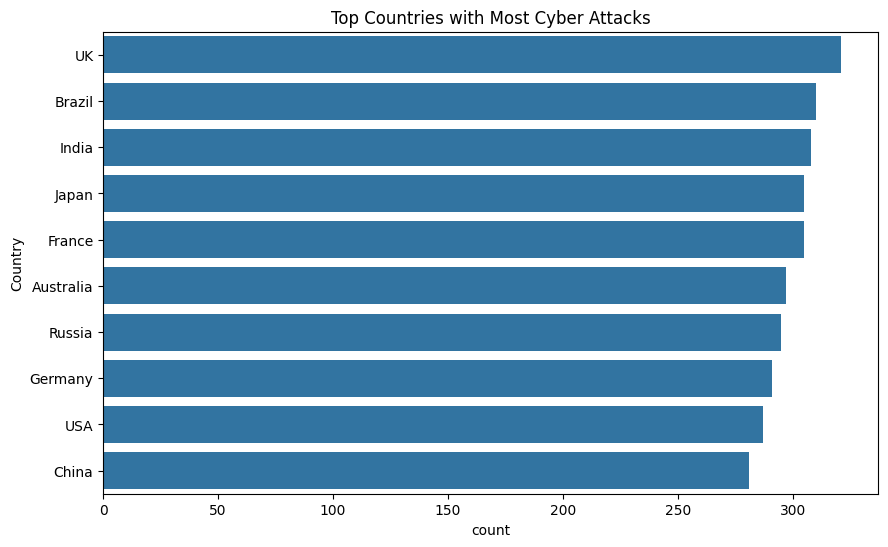

In [14]:
plt.figure(figsize=(10,6))
sns.countplot(y='Country', data=df, order=df['Country'].value_counts().index)
plt.title('Top Countries with Most Cyber Attacks')
plt.show()


Distribution of Attack Types

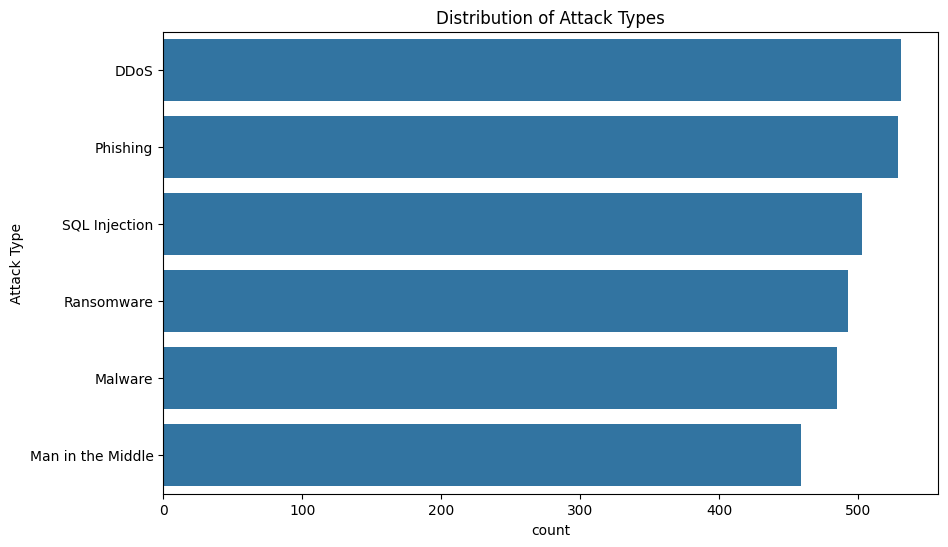

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(y='Attack Type', data=df, order=df['Attack Type'].value_counts().index)
plt.title('Distribution of Attack Types')
plt.show()


 Machine Learning Part - Predicting Financial Loss or Attack Type

# Option A: Predict Financial Loss (Regression)
# Option B: Predict Attack Type (Classification)

# We'll demonstrate both tasks. Let's choose Regression first.


# Feature Engineering
# Select relevant **features**

In [16]:
features = ['Country', 'Year', 'Attack Type', 'Target Industry', 'Security Vulnerability Type', 'Defense Mechanism Used']
X = df[features]
y_regression = df['Financial Loss (in Million $)']  # Target variable for regression
y_classification = df['Attack Type']               # Target variable for classification


# Encode categorical variables

In [17]:
label_encoders = {}
for col in X.columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le


/tmp/ipython-input-17-2490738731.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
/tmp/ipython-input-17-2490738731.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
/tmp/ipython-input-17-2490738731.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

# Split data into train and test sets

In [18]:
X_train, X_test, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.2, random_state=42)
_, _, y_train_clf, y_test_clf = train_test_split(X, y_classification, test_size=0.2, random_state=42)


Regression - Predict Financial Loss

In [19]:
reg_model = RandomForestRegressor(n_estimators=100, random_state=42)
reg_model.fit(X_train, y_train_reg)
y_pred_reg = reg_model.predict(X_test)


In [20]:
mae = mean_absolute_error(y_test_reg, y_pred_reg)
print(f"\n📉 Mean Absolute Error in Financial Loss Prediction: ${mae:.2f}M")



📉 Mean Absolute Error in Financial Loss Prediction: $25954975.59M


Classification - Predict Attack Type

In [21]:
clf_model = RandomForestClassifier(n_estimators=100, random_state=42)
clf_model.fit(X_train, y_train_clf)
y_pred_clf = clf_model.predict(X_test)


In [22]:
print("\n🔍 Classification Report for Attack Type Prediction:")
print(classification_report(y_test_clf, y_pred_clf))


🔍 Classification Report for Attack Type Prediction:
                   precision    recall  f1-score   support

             DDoS       1.00      1.00      1.00       111
          Malware       1.00      1.00      1.00        97
Man in the Middle       1.00      1.00      1.00        99
         Phishing       1.00      1.00      1.00       103
       Ransomware       1.00      1.00      1.00        79
    SQL Injection       1.00      1.00      1.00       111

         accuracy                           1.00       600
        macro avg       1.00      1.00      1.00       600
     weighted avg       1.00      1.00      1.00       600



Feature Importance for Regression

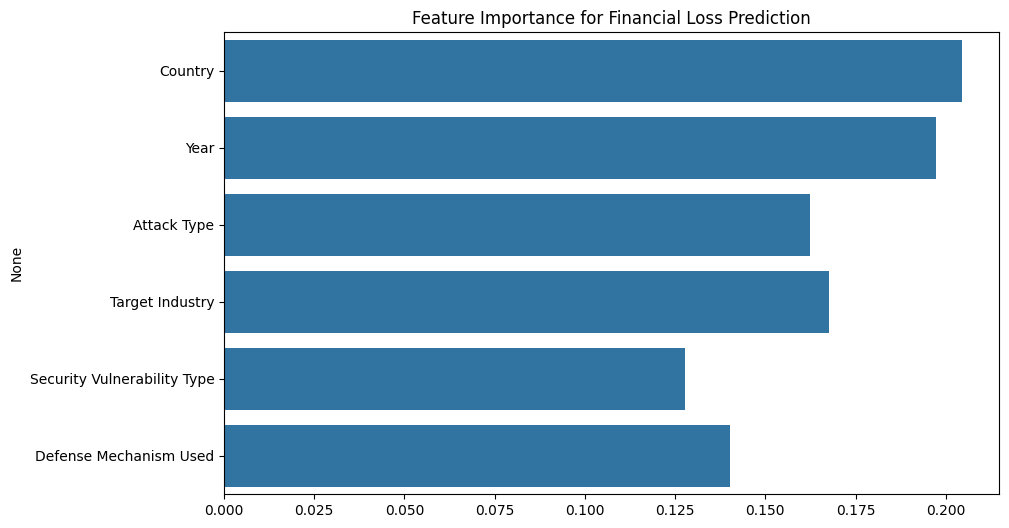

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(x=reg_model.feature_importances_, y=X.columns)
plt.title('Feature Importance for Financial Loss Prediction')
plt.show()

Advanced Machine Learning (XGBoost + GridSearchCV)

We'll focus on predicting Financial Loss (in Million $) using XGBoost Regressor , and tune it using GridSearchCV.

In [24]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')


In [25]:
#Step 2: Load and clean data
df = pd.read_csv('Cyber Security .csv')


In [26]:
# Clean financial loss column
df['Financial Loss (in Million $)'] = df['Financial Loss (in Million $)'].str.replace('[,$]', '', regex=True).astype(float)
df['Number of Affected Users'] = df['Number of Affected Users'].str.replace(',', '').astype(int)
df['Incident Resolution Time (in Hours)'] = pd.to_numeric(df['Incident Resolution Time (in Hours)'], errors='coerce').fillna(0)


In [27]:
# Feature Selection
features = ['Country', 'Year', 'Attack Type', 'Target Industry', 'Security Vulnerability Type', 'Defense Mechanism Used']
X = df[features]
y = df['Financial Loss (in Million $)']


In [28]:
# Encode categorical features
label_encoders = {}
for col in X.columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

In [29]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
#Initialize XGBoost Regressor
xgb_model = XGBRegressor(random_state=42)


In [31]:
#Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

In [32]:
#Grid Search
grid_search = GridSearchCV(estimator=xgb_model,
                           param_grid=param_grid,
                           scoring='neg_mean_absolute_error',
                           cv=5,
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='neg_mean_absolute_error', verbose=1)

In [33]:
#Best Model
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)


In [34]:
mae = mean_absolute_error(y_test, y_pred)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Mean Absolute Error after tuning: ${mae:.2f}M")

Best Parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 50, 'subsample': 0.8}
Mean Absolute Error after tuning: $24647905.01M


In [35]:
from sklearn.ensemble import IsolationForest

# Use the same cleaned feature set
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
df['anomaly_score'] = iso_forest.fit_predict(X)

# Add anomaly flag (-1 is outlier, 1 is normal)
df['is_anomaly'] = df['anomaly_score'].apply(lambda x: 'Outlier' if x == -1 else 'Normal')

# Display top anomalies
anomalies = df[df['is_anomaly'] == 'Outlier']
print("\nTop Anomalous Cyber Attacks:")
print(anomalies[['Country', 'Year', 'Attack Type', 'Financial Loss (in Million $)', 'is_anomaly']])


Top Anomalous Cyber Attacks:
        Country  Year    Attack Type  Financial Loss (in Million $) is_anomaly
24       Brazil  2023           DDoS                     51840000.0    Outlier
38          USA  2022           DDoS                     32530000.0    Outlier
43          USA  2017           DDoS                     74120000.0    Outlier
50          USA  2023           DDoS                     59690000.0    Outlier
58       Brazil  2015       Phishing                     43400000.0    Outlier
...         ...   ...            ...                            ...        ...
2895  Australia  2023  SQL Injection                     78570000.0    Outlier
2912  Australia  2016           DDoS                     93390000.0    Outlier
2939        USA  2024        Malware                     52200000.0    Outlier
2968     Brazil  2015     Ransomware                     63140000.0    Outlier
2983  Australia  2024           DDoS                     36490000.0    Outlier

[150 rows x 5 columns